# **<font color='blue'>panData</font>**

# **<font color='blue'>Association Rules and Market Basket Analysis</font>**

## **Python Packages Used in the Project**

In [1]:
!pip install -q -U watermark

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.4 MB/s eta 0:00:00


https://pypi.org/project/efficient-apriori/

In [2]:
!pip install -q efficient_apriori

In [3]:
# 1. Imports
import numpy as np
import pandas as pd
import efficient_apriori
import matplotlib.pyplot as plt
from datetime import datetime
from itertools import combinations
from efficient_apriori import apriori
import warnings
warnings.filterwarnings('ignore')

In [4]:
%reload_ext watermark
%watermark -a "panData"

Author: panData



## **Loading the Data**

In [5]:
# 2. Load the data
departments_data = pd.read_csv('departments.csv')
aisles_data = pd.read_csv('aisles.csv')
products_data = pd.read_csv('products.csv')
orders_data = pd.read_csv('orders.csv')
transactions_data = pd.read_csv('transactions.csv')

## **Exploratory Analysis**

### **Details of the Size of Each Dataset**

In [6]:
# 3. Total number of records per dataset
record_counts = np.array([['departments_data', len(departments_data)],
                          ['aisles_data', len(aisles_data)],
                          ['products_data', len(products_data)],
                          ['orders_data', len(orders_data)],
                          ['transactions_data', len(transactions_data)]])

In [7]:
# 4. Convert the array to a DataFrame
record_count_df = pd.DataFrame(record_counts, columns=['File', 'Total Records'])

In [8]:
# 5. Print the DataFrame
print(record_count_df)

                File Total Records
0   departments_data            21
1        aisles_data           134
2      products_data         49688
3        orders_data       3421083
4  transactions_data      32434489


In [9]:
# 6. Shape of departments_data
departments_data.shape

(21, 2)

In [10]:
# 7. Display the first few rows of departments_data
departments_data.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [11]:
# 8. Shape of aisles_data
aisles_data.shape

(134, 2)

In [12]:
# 9. Display the first few rows of aisles_data
aisles_data.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [13]:
# 10. Shape of products_data
products_data.shape

(49688, 4)

In [14]:
# 11. Display the first few rows of products_data
products_data.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [15]:
# 12. Shape of orders_data
orders_data.shape

(3421083, 7)

In [16]:
orders_data.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [17]:
# 13. Shape of transactions_data
transactions_data.shape

(32434489, 4)

In [18]:
# 14. Display the first few rows of transactions_data
transactions_data.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


### **Checking for Missing Values**

In [19]:
# 15. Check for missing values in departments_data
departments_data.isna().sum()

,0
department_id,0
department,0


In [20]:
# 16. Check for missing values in aisles_data
aisles_data.isna().sum()

,0
aisle_id,0
aisle,0


In [21]:
# 17. Check for missing values in products_data
products_data.isna().sum()

,0
product_id,0
product_name,0
aisle_id,0
department_id,0


In [22]:
# 18. Check for missing values in orders_data
orders_data.isna().sum()

,0
order_id,0
user_id,0
eval_set,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,206209


In [23]:
# 19. Check for missing values in transactions_data
transactions_data.isna().sum()

,0
order_id,0
product_id,0
add_to_cart_order,0
reordered,0


## **Data Reorganization**

### **Merge the Tables**

In [24]:
# 20. Merge the Tables
%%time
transactions_data = transactions_data.merge(orders_data, on='order_id', how='left')
transactions_data = transactions_data.merge(products_data, on='product_id', how='left')
transactions_data = transactions_data.merge(aisles_data, on='aisle_id', how='left')
transactions_data = transactions_data.merge(departments_data, on='department_id', how='left')

CPU times: user 17.7 s, sys: 11.5 s, total: 29.2 s
Wall time: 28.9 s


In [25]:
# 21. Display the first few rows of transactions_data after merging
transactions_data.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry


In [26]:
# 22. Check for missing values in transactions_data after merging
transactions_data.isna().sum()

,0
order_id,0
product_id,0
add_to_cart_order,0
reordered,0
user_id,0
eval_set,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,2078068


In [27]:
# 23. Calculate the percentage of missing values in transactions_data
transactions_data.isnull().sum() / len(transactions_data) * 100

,0
order_id,0.00000
product_id,0.00000
add_to_cart_order,0.00000
reordered,0.00000
user_id,0.00000
eval_set,0.00000
order_number,0.00000
order_dow,0.00000
order_hour_of_day,0.00000
days_since_prior_order,6.40697


## **Keep the 'days_since_prior_order' variable for two reasons:**
1. The percentage of missing values is only 6.4%.
2. We will not use this variable with the MBA algorithm.

> We will group the data to apply the Apriori algorithm and prepare the dataset with all transactions.

In [28]:
# 24. Group the data to prepare for the Apriori algorithm
%%time
grouped_df = pd.DataFrame(transactions_data.groupby('order_id')['product_id'])

CPU times: user 2min 57s, sys: 8.22 s, total: 3min 6s
Wall time: 3min 3s


In [29]:
# 25. Shape of the grouped DataFrame
grouped_df.shape

(3214874, 2)

In [30]:
# 26. Display the first few rows of the grouped DataFrame
grouped_df.head()

,0,1
0,2,0 33120 1 28985 2 9327 3 45918 4 ...
1,3,9 33754 10 24838 11 17704 12 2190...
2,4,17 46842 18 26434 19 39758 20 2776...
3,5,30 13176 31 15005 32 47329 33 2796...
4,6,56 40462 57 15873 58 41897 Name: prod...


In [31]:
# 27. List to store products
prod = []

In [32]:
# 28. Append products to the list
%%time
for i in range(len(grouped_df[0])):
    prod.append(list(grouped_df.iloc[i][1]))

CPU times: user 2min 20s, sys: 1.33 s, total: 2min 21s
Wall time: 2min 21s


In [33]:
# 29. Create a copy of the product list
prod_ = prod

In [34]:
# 30. Store the order IDs in a variable
order_ = grouped_df[0]

In [35]:
# 31. Prepare the DataFrame
transactions = pd.DataFrame({'Order_ID': order_, 'Products': prod_})

In [36]:
# 32. Display the first 10 rows of the transactions DataFrame
transactions.head(10)

,Order_ID,Products
0,2,"[33120, 28985, 9327, 45918, 30035, 17794, 4014..."
1,3,"[33754, 24838, 17704, 21903, 17668, 46667, 174..."
2,4,"[46842, 26434, 39758, 27761, 10054, 21351, 225..."
3,5,"[13176, 15005, 47329, 27966, 23909, 48370, 132..."
4,6,"[40462, 15873, 41897]"
5,7,"[34050, 46802]"
6,8,[23423]
7,9,"[21405, 47890, 11182, 2014, 29193, 34203, 1499..."
8,10,"[24852, 4796, 31717, 47766, 4605, 1529, 21137,..."
9,11,"[30162, 27085, 5994, 1313, 31506]"


## **Now It's Up to You**


### 1. What is the Most Frequent Order Number Among Users?
### 2. Which Day of the Week Has the Highest Number of Orders?
### 3. What Hour of the Day Has the Highest Number of Orders?
### 4. Which Department Has the Highest Number of Orders?
###5. What Are the Top 20 Aisles by Order Frequency?
###6. What Are the Top 20 Products by Order Frequency?
### 7. Analyze New Orders Similar to Previous Orders (Reorder)
### 8. Analyze Reorders by Department Over Time
### 9. Analyze Reorders and Orders
### 10. Analyze Reorders by Aisle
### 11. Analyze Reorders by Aisle (Total)



---

## **Descriptive Statistical Analysis**

### 1. What is the Most Frequent Order Number Among Users?

In [37]:
# 33. Random sample of data
orders_data.sample(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
2056082,2372373,123565,prior,69,5,13,5.0
1364613,2128489,81992,prior,6,2,12,10.0
14612,2930870,911,prior,8,5,8,8.0
400988,2324853,24100,prior,2,1,16,30.0
2463601,825778,148271,prior,29,0,18,0.0
11266,1796057,696,prior,30,1,10,7.0
667341,851290,40208,train,26,6,14,10.0
1194263,1052617,71798,prior,7,0,16,3.0
749051,715084,45077,prior,3,6,10,10.0
2802154,177294,169036,prior,20,3,16,8.0


In [38]:
# 34. Group the data by user, aggregating by the highest order_number
max_order_count = orders_data.groupby("user_id")['order_number'].aggregate(np.max).reset_index()
max_order_count.head()

,user_id,order_number
0,1,11
1,2,15
2,3,13
3,4,6
4,5,5




### Understanding the Previous Code:

**order.groupby("user_id"):** This command groups the order DataFrame by the “user_id” column. This means that all rows with the same value in user_id are considered together in one group. The grouping operation is preparatory for performing some aggregation operation within each group.

**['order_number'].aggregate(np.max):** After grouping the data by user_id, we select the ‘order_number’ column from those groups. Then, we use the aggregate function with np.max (which is NumPy’s maximum function) to calculate the highest value of ‘order_number’ within each group. In other words, for each user, we are finding the maximum order number.

**.reset_index():** This method is used to reset the index of the DataFrame. When we perform a grouping operation, pandas transforms the columns by which we grouped (in this case, user_id) into indices in the new DataFrame. Using reset_index() moves user_id back to a regular column and creates a new standard numerical index.

In [39]:
# 35. Frequency of each order number value
max_order_count = max_order_count.order_number.value_counts()
max_order_count.head()

,count
order_number,
4,23986
5,19590
6,16165
7,13850
8,11700


Now we plug the data into the chart:

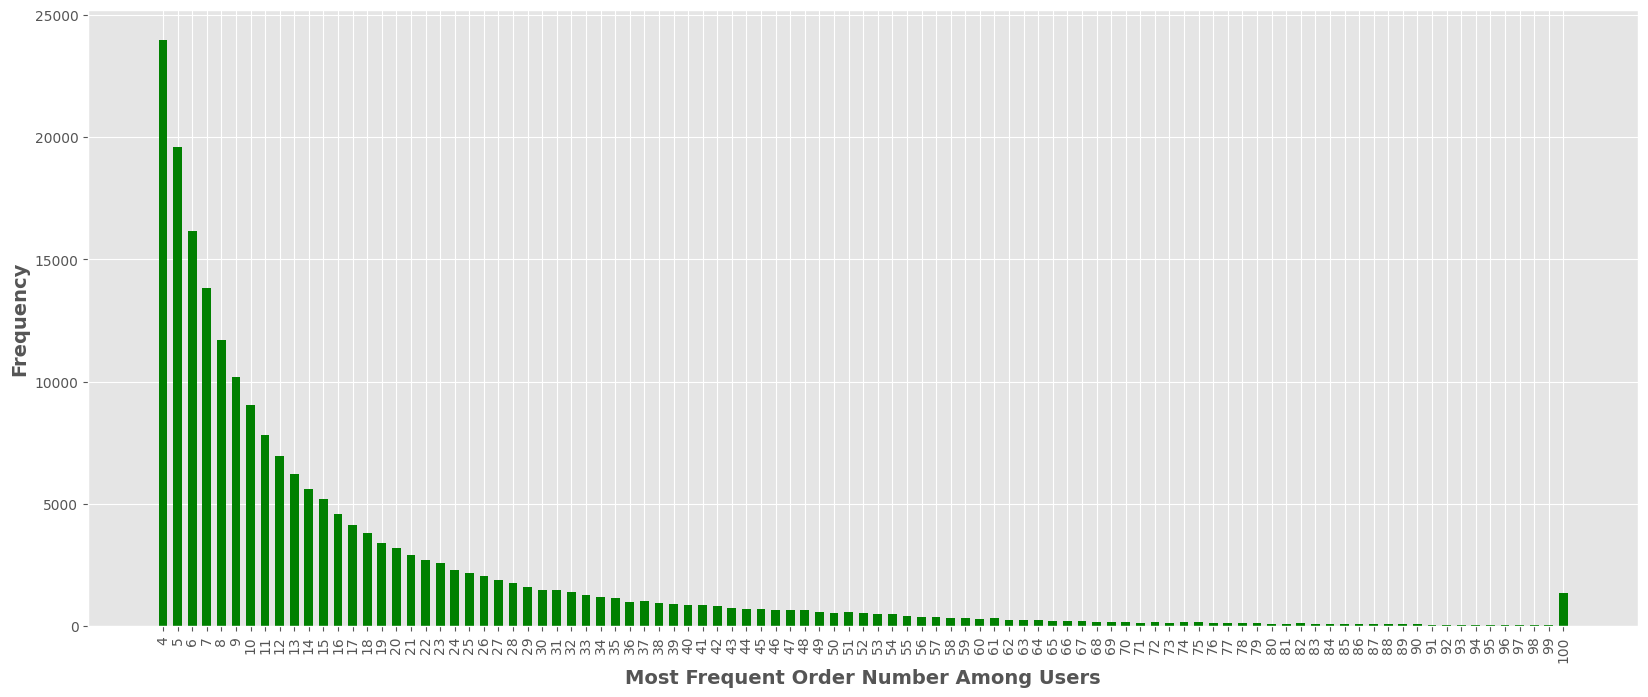

In [40]:
# 37. Plot
plt.style.use('ggplot')
plt.figure(figsize=(20, 8))
plt.bar(max_order_count.index, max_order_count.values, color='green', width=0.6)
plt.xticks(max_order_count.index, rotation='vertical')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.xlabel('Most Frequent Order Number Among Users', fontsize=14, fontweight='bold')
plt.show()

### 2 - Which Day of the Week Has the Highest Number of Orders?

In [41]:
# 38. (dow = day of the week)
orders_data.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [42]:
# 39. Frequency count (occurrence) of each value of order_dow
orders_data.order_dow.value_counts()

,count
order_dow,
0,600905
1,587478
2,467260
5,453368
6,448761
3,436972
4,426339


Let's prepare x and y for the chart in the format of Python lists.

In [43]:
# 40. Index for the days of the week
x = [0, 1, 2, 3, 4, 5, 6]

In [44]:
# 41. Frequencies of orders by index (day of the week)
y = orders_data['order_dow'].value_counts().sort_index().tolist()

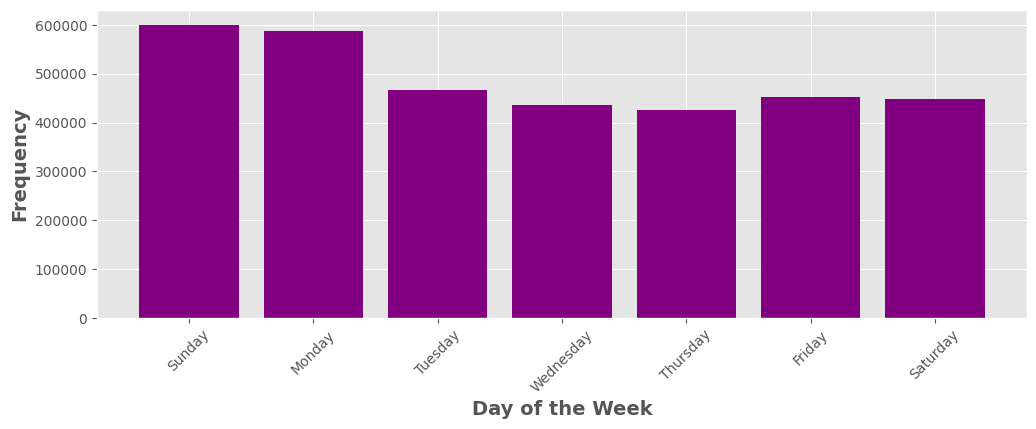

In [45]:
# 42. Plot
plt.figure(figsize=(12, 4))
plt.bar(x, y, color='purple')
plt.xlabel('Day of the Week', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.xticks(x, ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], rotation=45)
plt.show()

<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->

### 3 - What Hour of the Day Has the Highest Number of Orders?

In [46]:
# 43. Display the first few rows of orders_data
orders_data.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [47]:
# 44. Frequencies of orders by hour of the day
x1 = list(range(0, 24))
print(x1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [48]:
# 45. Frequencies of orders by hour of the day
y1 = []
for i in range(0, 24):
    y1.append(orders_data[orders_data['order_hour_of_day'] == i].shape[0])
print(y1)

[22758, 12398, 7539, 5474, 5527, 9569, 30529, 91868, 178201, 257812, 288418, 284728, 272841, 277999, 283042, 283639, 272553, 228795, 182912, 140569, 104292, 78109, 61468, 40043]


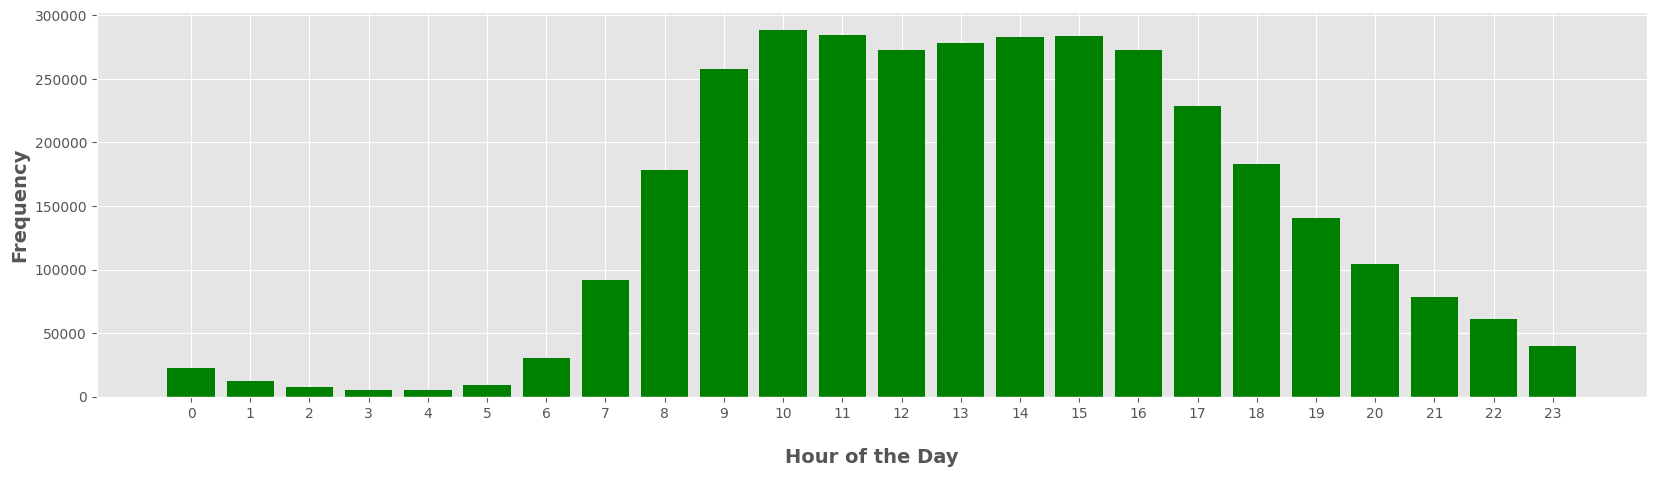

In [49]:
# 46. Plot
plt.figure(figsize=(20, 5))
plt.bar(x1, y1, color='green')
plt.xticks(np.arange(0, 24, 1))
plt.xlabel('\nHour of the Day', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.show()

> Solução 2 com Recursos do Pandas

In [50]:
# 47. Group by hour of the day and count the orders
frequency_by_hour = orders_data.groupby('order_hour_of_day').size()
frequency_by_hour.head()

,0
order_hour_of_day,
0,22758
1,12398
2,7539
3,5474
4,5527


In [51]:
# 48. Display the first 24 entries of frequency_by_hour
frequency_by_hour.head(24)

,0
order_hour_of_day,
0,22758
1,12398
2,7539
3,5474
4,5527
5,9569
6,30529
7,91868
8,178201


In [52]:
# 49. Extract hours and counts into lists x and y
x2 = frequency_by_hour.index.tolist()
y2 = frequency_by_hour.values.tolist()

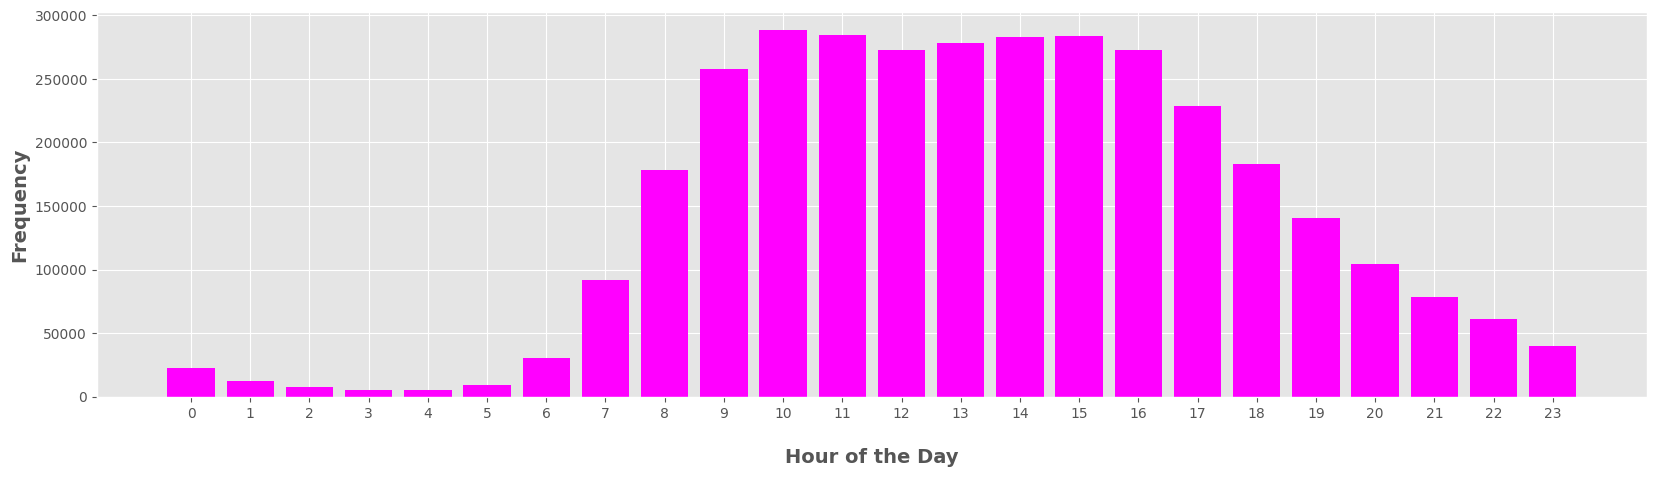

In [53]:
# 50. Plot
plt.figure(figsize=(20, 5))
plt.bar(x2, y2, color='magenta')
plt.xticks(np.arange(0, 24, 1))
plt.xlabel('\nHour of the Day', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.show()

### 4 - Which Department Has the Highest Number of Orders?

In [54]:
# 51. Display the first few rows of orders_data
orders_data.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [55]:
# 52. Display the first few rows of transactions_data
transactions_data.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry


In [56]:
# 53. Count of orders by department
department_count = transactions_data['department'].value_counts()
department_count.head()

,count
department,
produce,9479291
dairy eggs,5414016
snacks,2887550
beverages,2690129
frozen,2236432


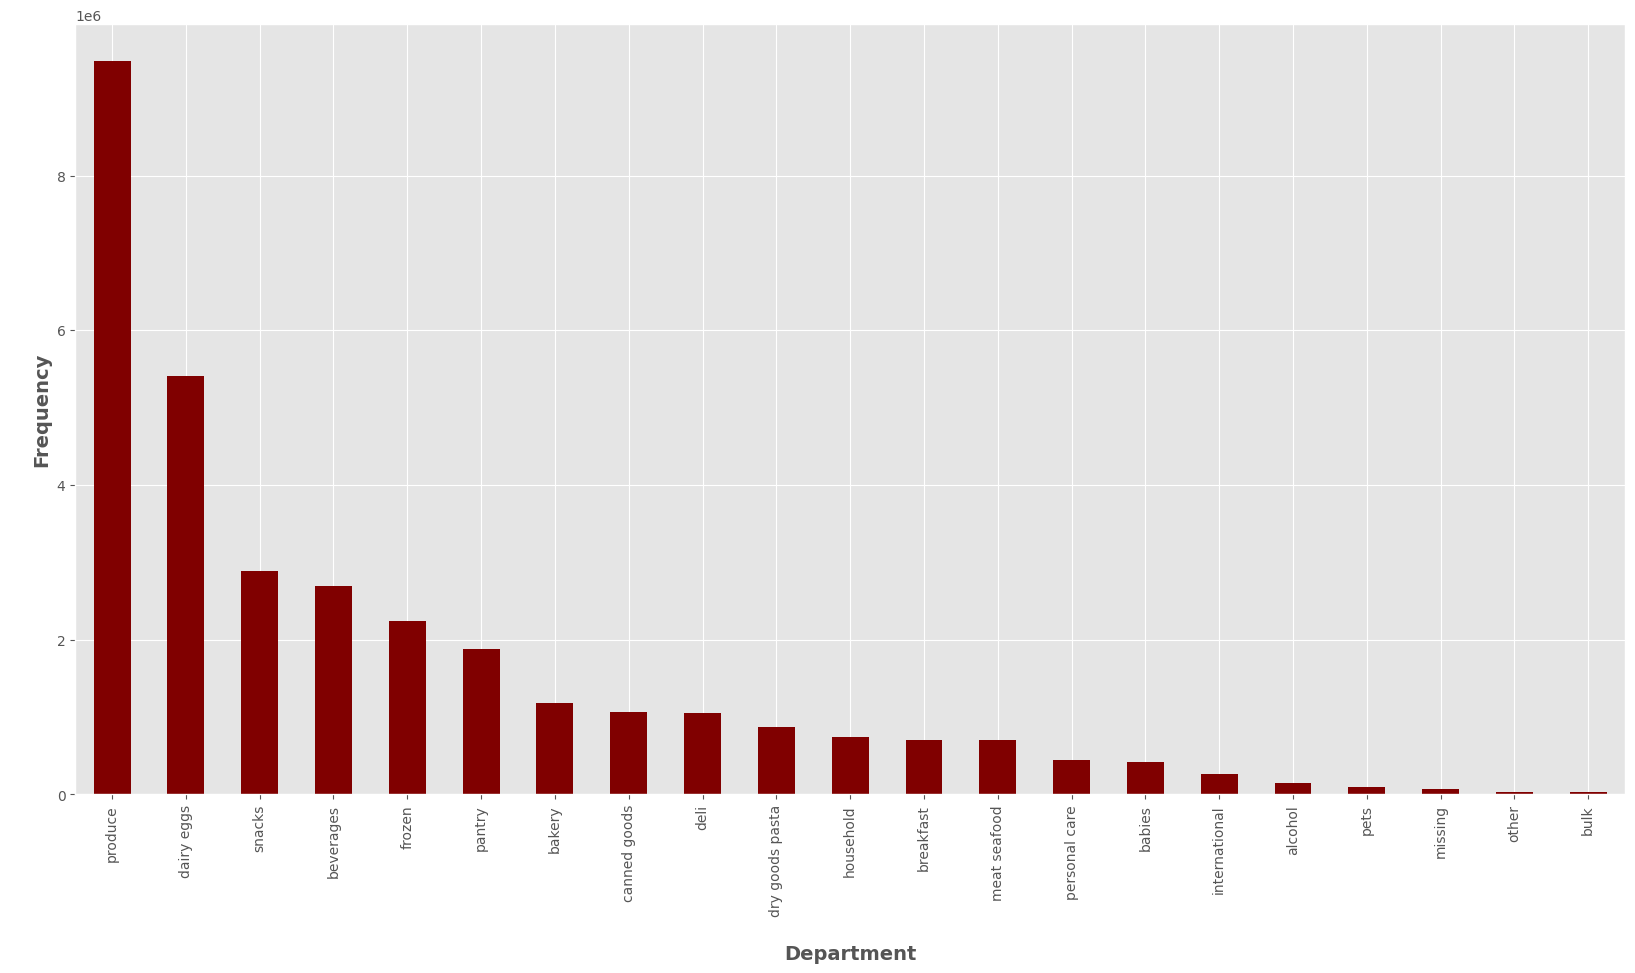

In [57]:
# 54. Plot
fig = plt.figure(figsize=(20, 10))
department_count.plot(kind="bar", color='maroon')
plt.xticks(rotation=90)
plt.xlabel('\nDepartment', fontsize=14, fontweight='bold')
plt.ylabel('\nFrequency', fontsize=14, fontweight='bold')
plt.show()

The above solution works because the transactions_data table contains the names of the departments.

If it were necessary to look up the name in another table, the solution would be different:

In [58]:
# 55. Merge transactions_data with products_data
# Here, suffixes are used to differentiate columns with the same name
transactions_products = pd.merge(transactions_data, products_data, on='product_id', suffixes=('', '_product'))
transactions_products.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department,product_name_product,aisle_id_product,department_id_product
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs,Organic Egg Whites,86,16
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce,Michigan Organic Kale,83,4
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry,Garlic Powder,104,13
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry,Coconut Butter,19,13
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry,Natural Sweetener,17,13


In [59]:
# 56. Now, let's use the appropriate 'department_id' column for the next merge
# Ensuring that we are using 'department_id' from the products_data DataFrame
transactions_departments = pd.merge(transactions_products, departments_data, on='department_id')
transactions_departments.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department_x,product_name_product,aisle_id_product,department_id_product,department_y
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs,Organic Egg Whites,86,16,dairy eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce,Michigan Organic Kale,83,4,produce
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry,Garlic Powder,104,13,pantry
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry,Coconut Butter,19,13,pantry
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry,Natural Sweetener,17,13,pantry


In [60]:
# 57. Count the transactions by department
department_count_final = transactions_departments['department_x'].value_counts()
department_count_final.head()

,count
department_x,
produce,9479291
dairy eggs,5414016
snacks,2887550
beverages,2690129
frozen,2236432


In [61]:
# 58. Find the department with the highest number of orders
most_orders_department = department_count_final.idxmax()

In [62]:
# 59. Print the department with the highest number of orders
print(most_orders_department)

produce


### 5 - What Are the Top 20 Aisles by Order Frequency?

In [63]:
# 60. Display the first few rows of transactions_data
transactions_data.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry


In [64]:
# 61. The top 20 aisles and their order frequency
aisle_count = transactions_data['aisle'].value_counts()

In [65]:
# 62. Display the top 20 aisles and their order frequency
aisle_count[0:20]

,count
aisle,
fresh fruits,3642188
fresh vegetables,3418021
packaged vegetables fruits,1765313
yogurt,1452343
packaged cheese,979763
milk,891015
water seltzer sparkling water,841533
chips pretzels,722470
soy lactosefree,638253


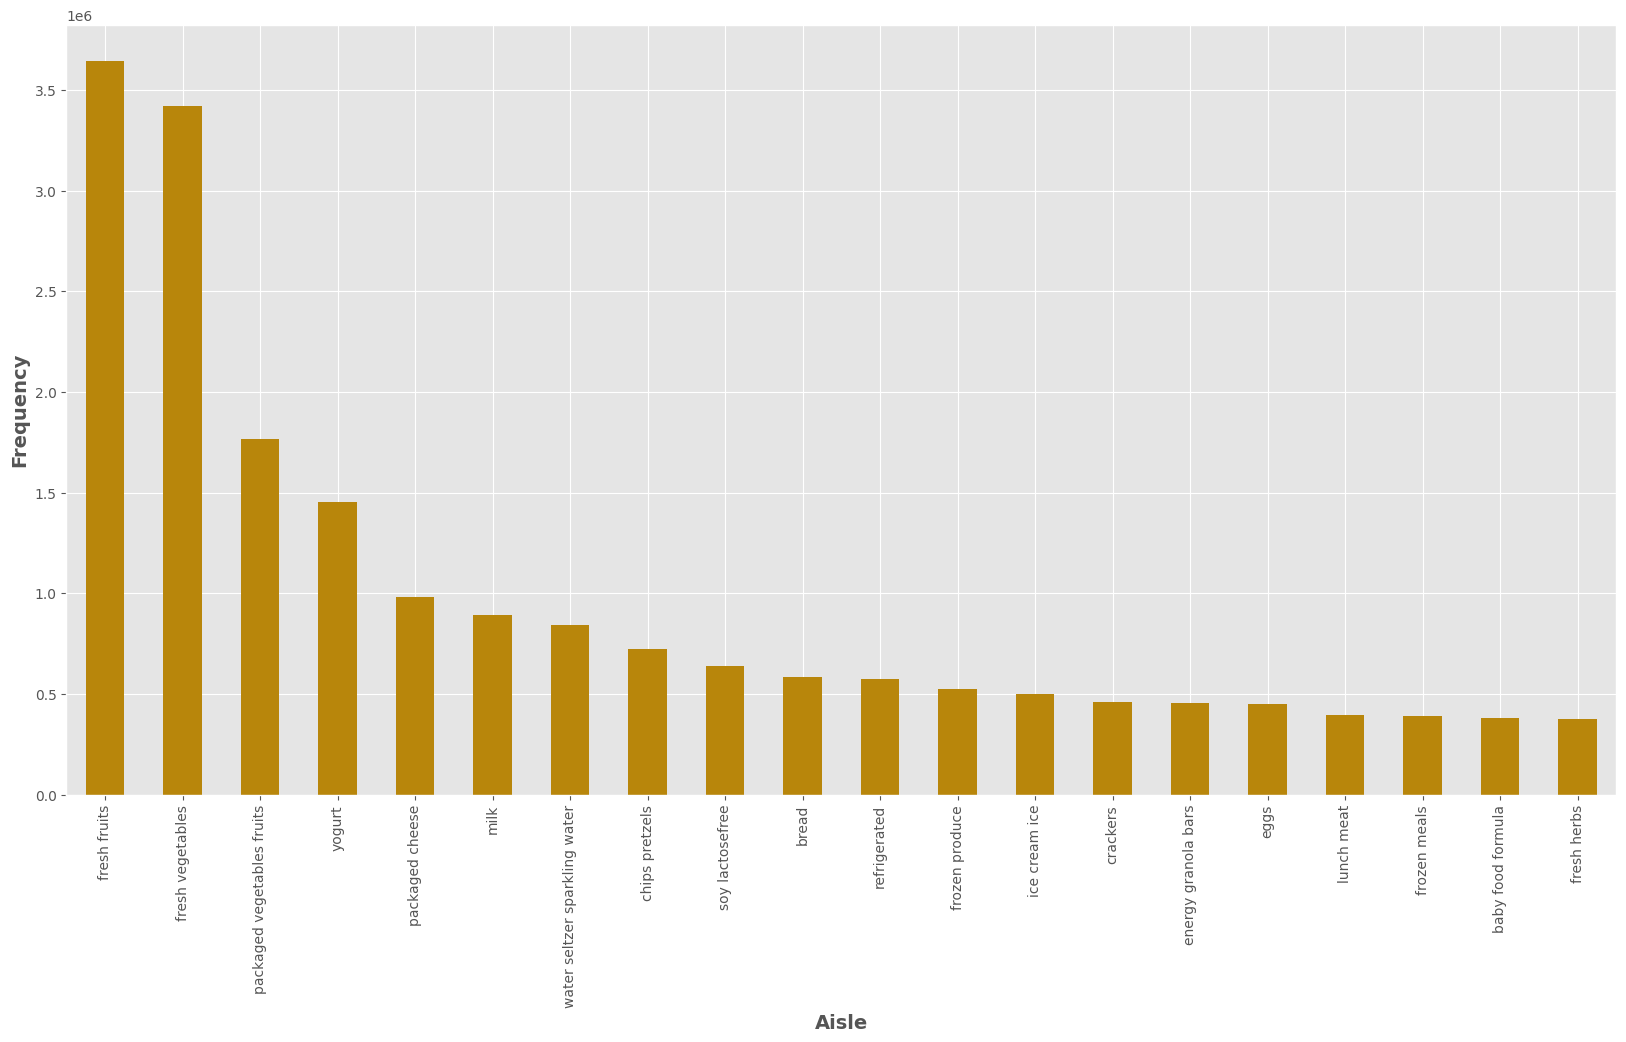

In [66]:
# 63. Plot
fig = plt.figure(figsize=(20, 10))
aisle_count[0:20].plot(kind="bar", color='darkgoldenrod')
plt.xticks(rotation=90)
plt.xlabel('Aisle', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.show()

Same case as item 4. By chance, the data is all in the transactions_data table.

If not, we would have to merge it as shown in the example below:

In [67]:
# 65. Count the frequency of each product in transactions_data
product_frequency = transactions_data['product_id'].value_counts()

# 66. Create a dictionary to map product_id to aisle_id
product_to_aisle = dict(zip(products_data['product_id'], products_data['aisle_id']))

# 67. Create a dictionary to map aisle_id to aisle name
id_to_aisle_name = dict(zip(aisles_data['aisle_id'], aisles_data['aisle']))

# 68. Calculate the frequency of each aisle
aisle_frequency = {}
for product, freq in product_frequency.items():
    aisle_id = product_to_aisle.get(product)
    if aisle_id:
        aisle_name = id_to_aisle_name.get(aisle_id, "Unknown Aisle")
        aisle_frequency[aisle_name] = aisle_frequency.get(aisle_name, 0) + freq

# 69. Sort the aisles by frequency and get the top 20
top_aisles = sorted(aisle_frequency.items(), key=lambda x: x[1], reverse=True)[:20]

# 70. Display the top 20 aisles
for aisle, freq in top_aisles:
    print(f"Aisle: {aisle}, Frequency: {freq}")

Aisle: fresh fruits, Frequency: 3642188
Aisle: fresh vegetables, Frequency: 3418021
Aisle: packaged vegetables fruits, Frequency: 1765313
Aisle: yogurt, Frequency: 1452343
Aisle: packaged cheese, Frequency: 979763
Aisle: milk, Frequency: 891015
Aisle: water seltzer sparkling water, Frequency: 841533
Aisle: chips pretzels, Frequency: 722470
Aisle: soy lactosefree, Frequency: 638253
Aisle: bread, Frequency: 584834
Aisle: refrigerated, Frequency: 575881
Aisle: frozen produce, Frequency: 522654
Aisle: ice cream ice, Frequency: 498425
Aisle: crackers, Frequency: 458838
Aisle: energy granola bars, Frequency: 456386
Aisle: eggs, Frequency: 452134
Aisle: lunch meat, Frequency: 395130
Aisle: frozen meals, Frequency: 390299
Aisle: baby food formula, Frequency: 382456
Aisle: fresh herbs, Frequency: 377741


### 6 - What Are the Top 20 Products by Order Frequency?

In [68]:
# 71. Display the first few rows of transactions_data
transactions_data.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry


In [69]:
# 72. The top 20 products by order frequency
product_count = transactions_data['product_name'].value_counts()

In [70]:
# 73. Display the top products by frequency
product_count.head()

,count
product_name,
Banana,472565
Bag of Organic Bananas,379450
Organic Strawberries,264683
Organic Baby Spinach,241921
Organic Hass Avocado,213584


In [71]:
# 74. Display the top 20 products by frequency
product_count[0:20]

,count
product_name,
Banana,472565
Bag of Organic Bananas,379450
Organic Strawberries,264683
Organic Baby Spinach,241921
Organic Hass Avocado,213584
Organic Avocado,176815
Large Lemon,152657
Strawberries,142951
Limes,140627


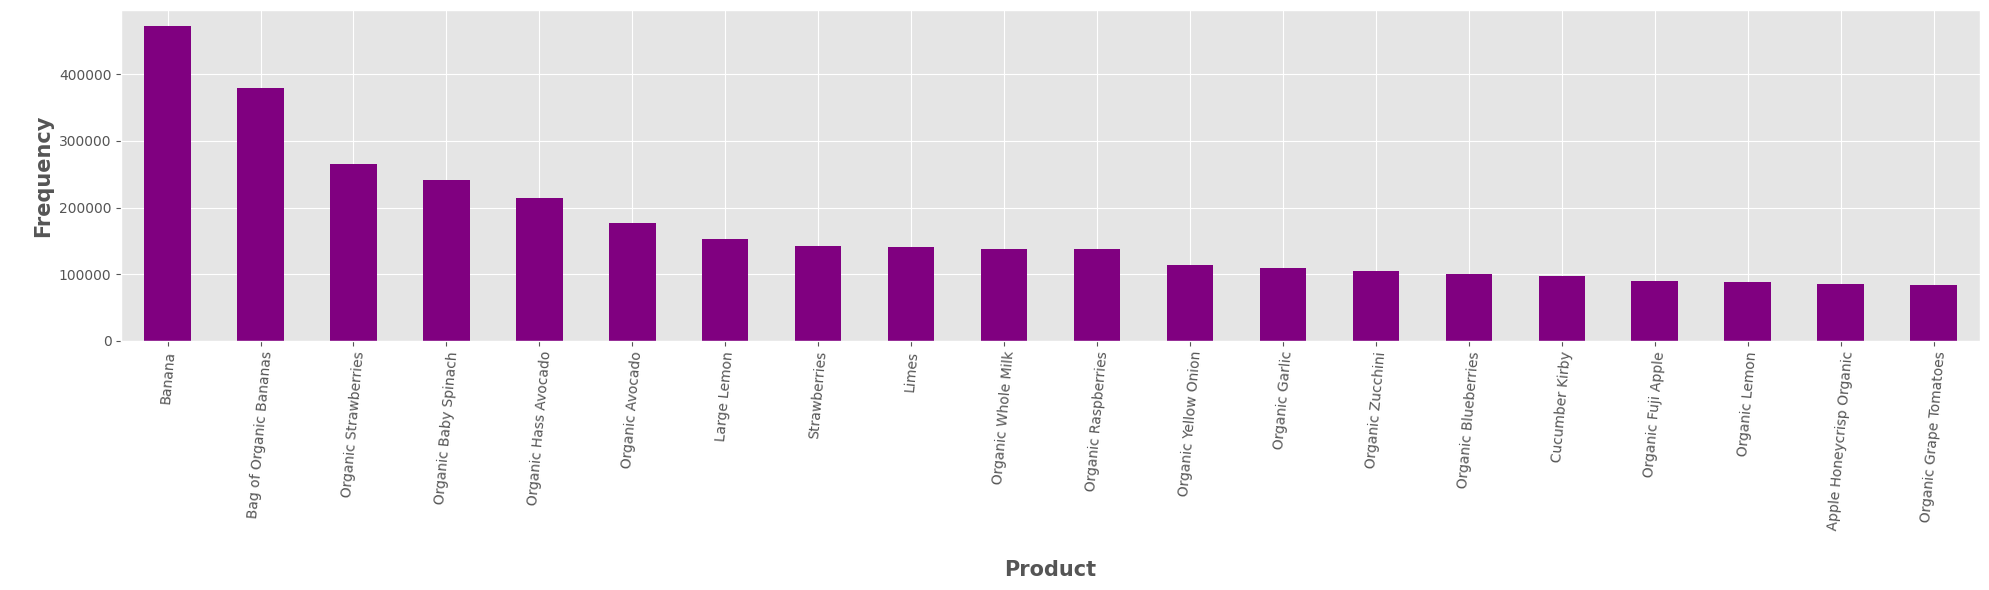

In [72]:
# 75. Plot
fig = plt.figure(figsize=(20, 6))
product_count[0:20].plot(kind="bar", color='purple')
plt.xticks(rotation=85)
plt.xlabel('\nProduct', fontsize=15, fontweight='bold')
plt.ylabel('\nFrequency', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

### 7 - Analyze New Orders Similar to Previous Orders (Reorder)
Let's group the data and obtain counts and sums.

In [73]:
# 76. Group the data by product_name and get count and sum
%%time
temp_df1 = transactions_data.groupby("product_name")["reordered"].agg(['count', 'sum']).rename(columns={'count': 'total', 'sum': 'reorders'})
temp_df1 = temp_df1.sort_values('total', ascending=False).reset_index()

CPU times: user 4.4 s, sys: 472 ms, total: 4.88 s
Wall time: 4.86 s




Understanding the Previous Code:

**transactions_data.groupby("product_name")["reordered"]:** This groups the dados_transacoes DataFrame by the value in the “product_name” column and then selects the “reordered” column for further operations.

**.agg(['count', 'sum']):** This applies two aggregation functions, count and sum, to the “reordered” column for each group (each unique product). The count function counts how many times each product appears in the DataFrame (i.e., the product frequency), and the sum function adds up the values in the “reordered” column for each group, indicating how many times the product has been reordered.

**.rename(columns={'count': 'total', 'sum': 'reorders'}):** This renames the resulting columns from the aggregation to “total” (previously “count”) and “reorders” (previously “sum”) to make the column names more descriptive.

**df_temp1 = ...:** The result of the above operations is assigned to a new DataFrame called df_temp1.

**df_temp1.sort_values('total', ascending=False):** This sorts the df_temp1 DataFrame by the “total” column in descending order. This means that the products with the highest frequencies (i.e., the most common) will appear first.

**.reset_index():** This resets the index of the resulting DataFrame so that the index is a simple numeric sequence (starting at 0). This is useful after sorting, as it ensures that the index reflects the new order of the data.

In [74]:
# 77. Prepare the lists with the top 20 records (to avoid cluttering the chart)
labels = list(temp_df1.product_name[0:20])
reorder = list(temp_df1.reorders[0:20])
total = list(temp_df1.total[0:20])

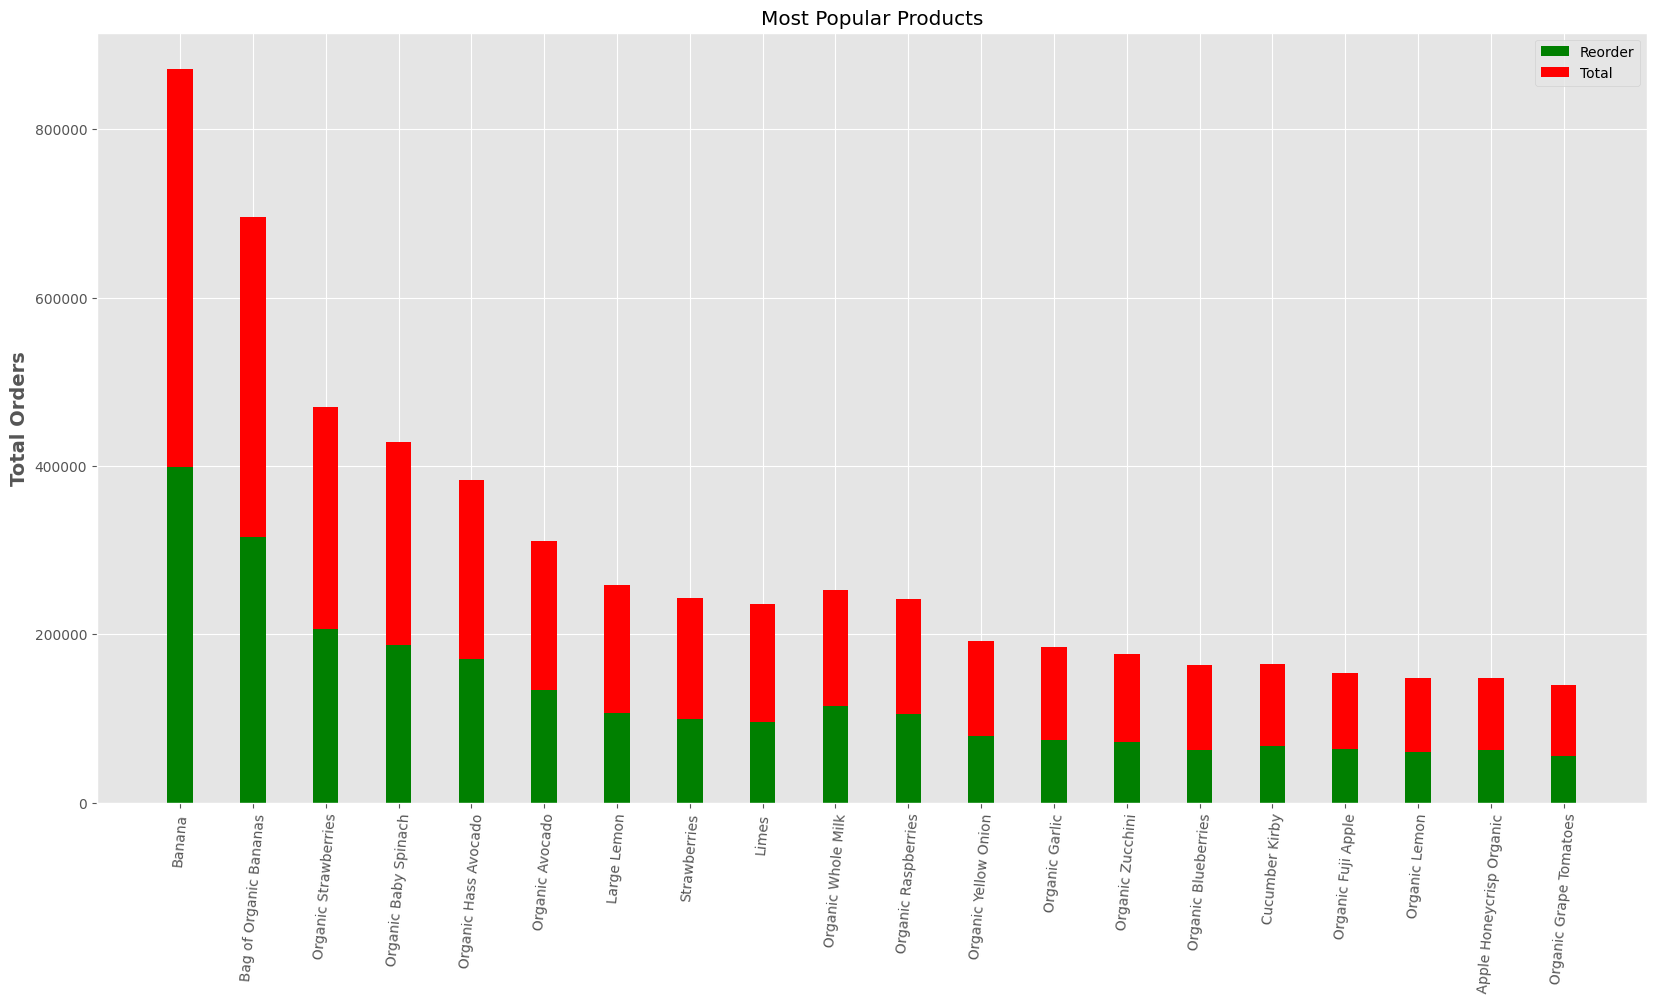

In [75]:
# 78. Plot
width = 0.35
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(labels, reorder, width, label='Reorder', color='green')
ax.bar(labels, total, width, bottom=reorder, label='Total', color='red')
ax.set_ylabel('Total Orders', fontsize=14, fontweight='bold')
ax.legend()
ax.set_title("Most Popular Products")
plt.xticks(rotation=85)
plt.show()

### 8 - Analyze Reorders by Department Over Time

In [76]:
# 79. Group the data by department and reorder
df_temp2 = transactions_data.groupby(["department"])["reordered"].aggregate("mean").reset_index()
df_temp2.head()

,department,reordered
0,alcohol,0.569924
1,babies,0.578971
2,bakery,0.628141
3,beverages,0.653460
4,breakfast,0.560922


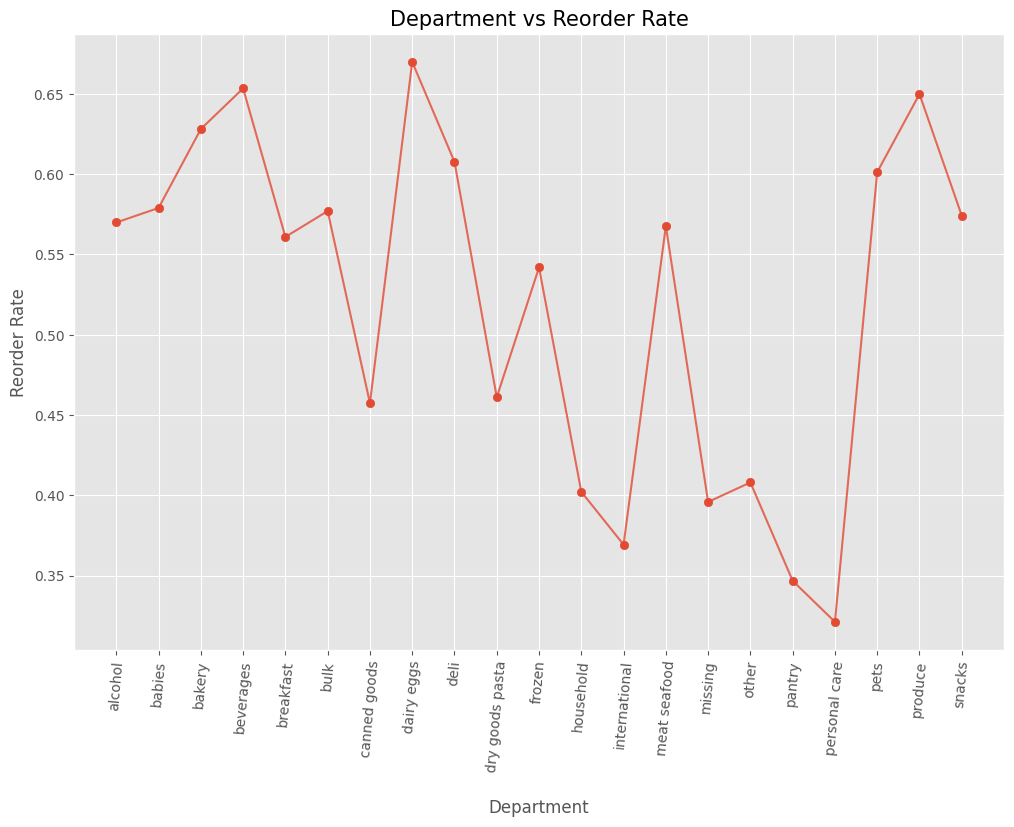

In [77]:
# 80. Plot
plt.figure(figsize=(12, 8))
plt.plot(list(df_temp2['department']), df_temp2['reordered'].values, alpha=0.8)
plt.scatter(list(df_temp2['department']), df_temp2['reordered'].values)
plt.ylabel('Reorder Rate', fontsize=12)
plt.xlabel('\nDepartment', fontsize=12)
plt.title("Department vs Reorder Rate", fontsize=15)
plt.xticks(rotation=85)
plt.show()

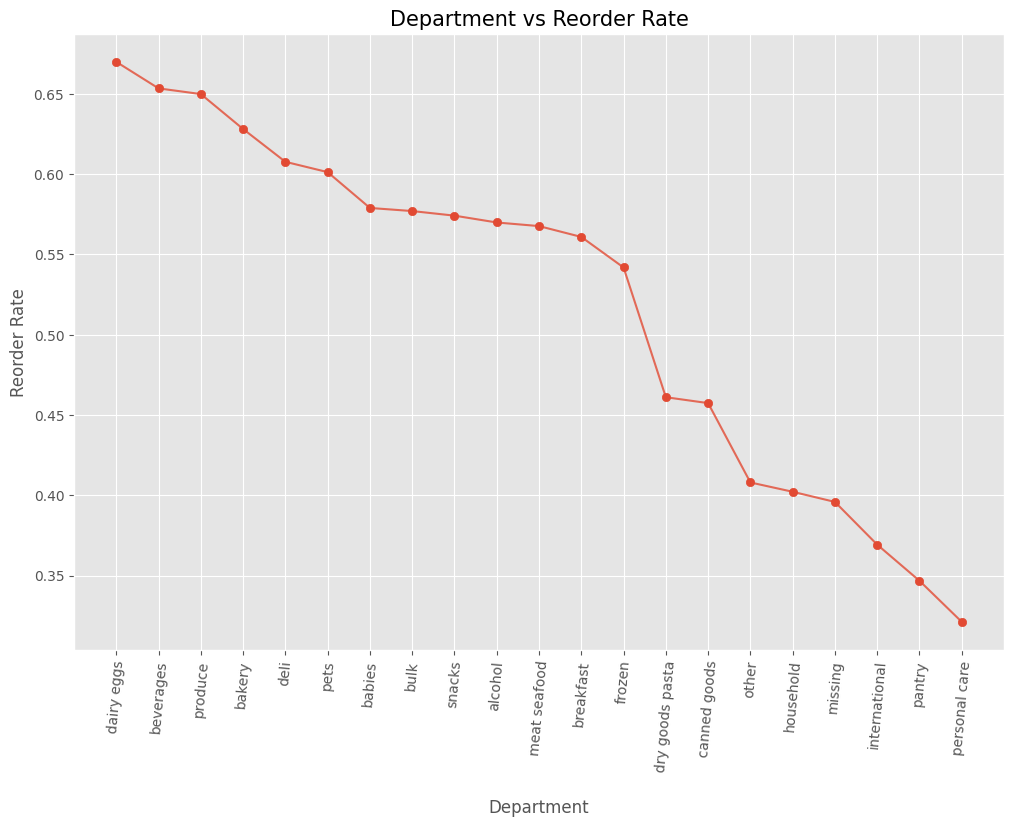

In [78]:
# Sorting the DataFrame by the 'reordered' column value
df_temp2 = df_temp2.sort_values(by='reordered', ascending=False)

# Generating the sorted plot
plt.figure(figsize=(12, 8))
plt.plot(list(df_temp2['department']), df_temp2['reordered'].values, alpha=0.8)
plt.scatter(list(df_temp2['department']), df_temp2['reordered'].values)
plt.ylabel('Reorder Rate', fontsize=12)
plt.xlabel('\nDepartment', fontsize=12)
plt.title("Department vs Reorder Rate", fontsize=15)
plt.xticks(rotation=85)
plt.show()

### 9 - Analyze Reorders and Orders

We grouped the data by department and reorder.

In [79]:
# 81. Group the data by department and reorder
%%time
df_temp3 = transactions_data.groupby("department")["reordered"].agg(['count', 'sum']).rename(columns={'count': 'total', 'sum': 'reorders'})
df_temp3 = df_temp3.sort_values('total', ascending=False).reset_index()

CPU times: user 2.14 s, sys: 465 ms, total: 2.61 s
Wall time: 2.6 s


The general objective of the above code snippet is to group the transaction data by department, calculate the total occurrences and the sum of reorders for each department, rename the resulting columns to be more descriptive, sort the departments by total frequency in descending order, and finally reset the index of the resulting DataFrame.

In [80]:
# 82. Display the first few rows of the grouped DataFrame
df_temp3.head()

,department,total,reorders
0,produce,9479291,6160710
1,dairy eggs,5414016,3627221
2,snacks,2887550,1657973
3,beverages,2690129,1757892
4,frozen,2236432,1211890


In [81]:
# 83. Lists
labels = list(df_temp3.department[0:20])
reorder = list(df_temp3.reorders[0:20])
total = list(df_temp3.total[0:20])

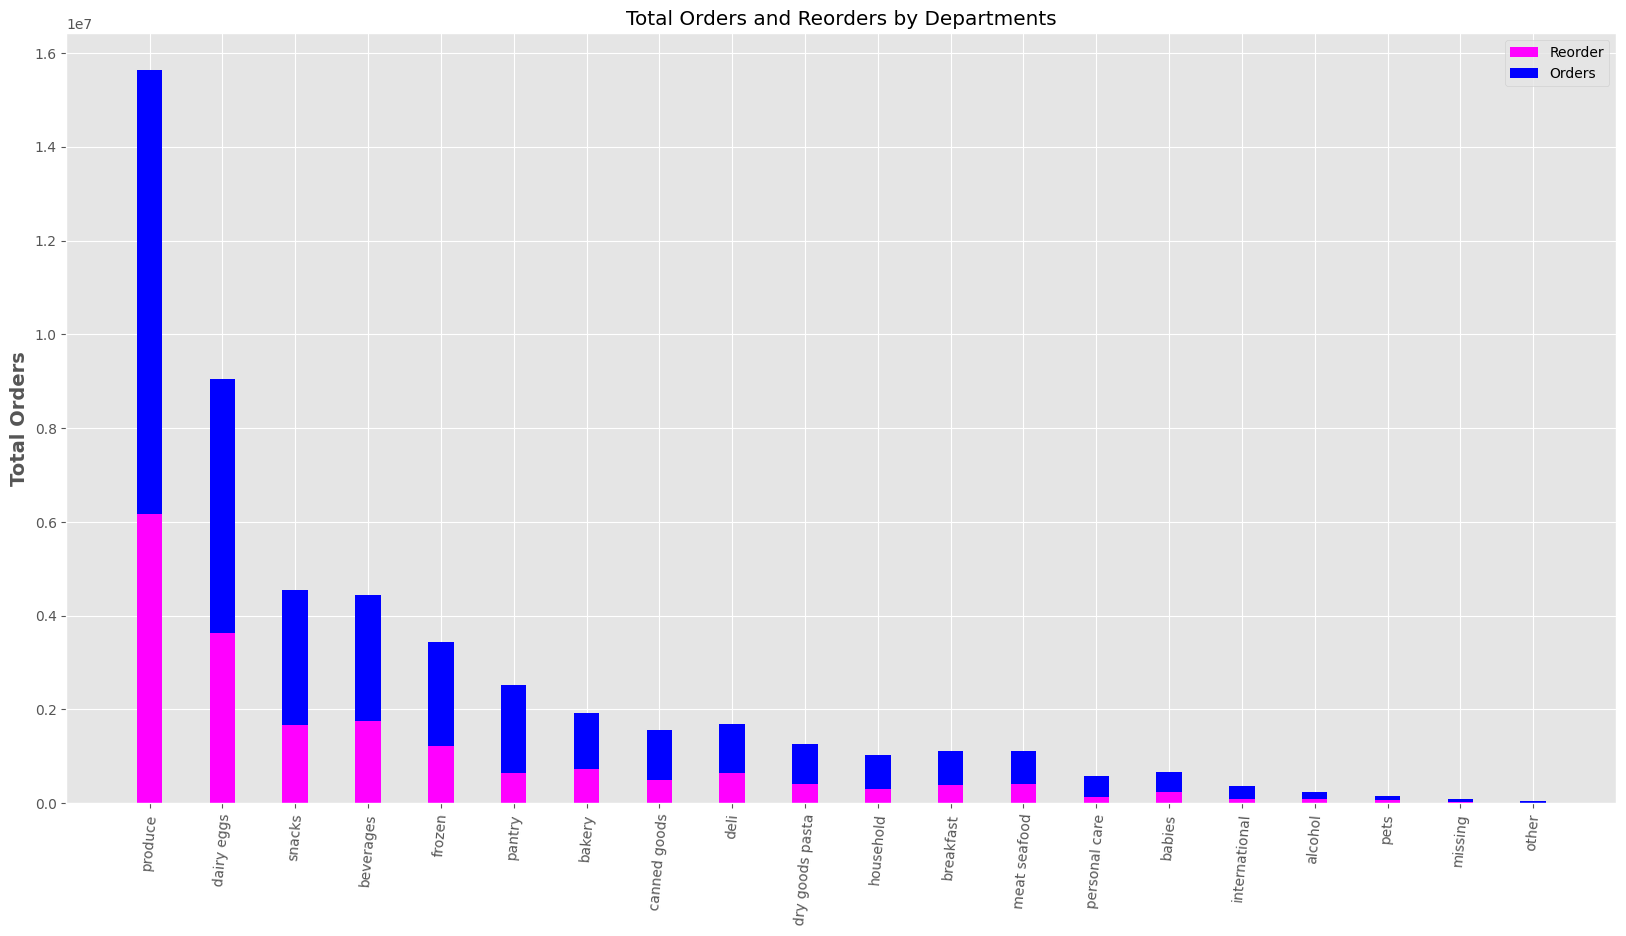

In [82]:
# 84. Plot
width = 0.35
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(labels, reorder, width, label='Reorder', color='magenta')
ax.bar(labels, total, width, bottom=reorder, label='Orders', color='blue')
ax.set_ylabel('Total Orders', fontsize=14, fontweight='bold')
ax.legend()
ax.set_title("Total Orders and Reorders by Departments")
plt.xticks(rotation=85)
plt.show()

### 10 - Analyze Reorders by Aisle

In [83]:
# 85. Group the data by aisle and calculate the mean reorder
%%time
df_temp4 = transactions_data.groupby(["aisle"])["reordered"].aggregate("mean").reset_index()
df_temp4.head()

CPU times: user 2.5 s, sys: 499 ms, total: 3 s
Wall time: 2.98 s


,aisle,reordered
0,air fresheners candles,0.309052
1,asian foods,0.351132
2,baby accessories,0.550980
3,baby bath body care,0.295770
4,baby food formula,0.590259


In [84]:
# 86. List the first 20 aisles
list(df_temp4['aisle'])[0:20]

['air fresheners candles',
 'asian foods',
 'baby accessories',
 'baby bath body care',
 'baby food formula',
 'bakery desserts',
 'baking ingredients',
 'baking supplies decor',
 'beauty',
 'beers coolers',
 'body lotions soap',
 'bread',
 'breakfast bakery',
 'breakfast bars pastries',
 'bulk dried fruits vegetables',
 'bulk grains rice dried goods',
 'buns rolls',
 'butter',
 'candy chocolate',
 'canned fruit applesauce']

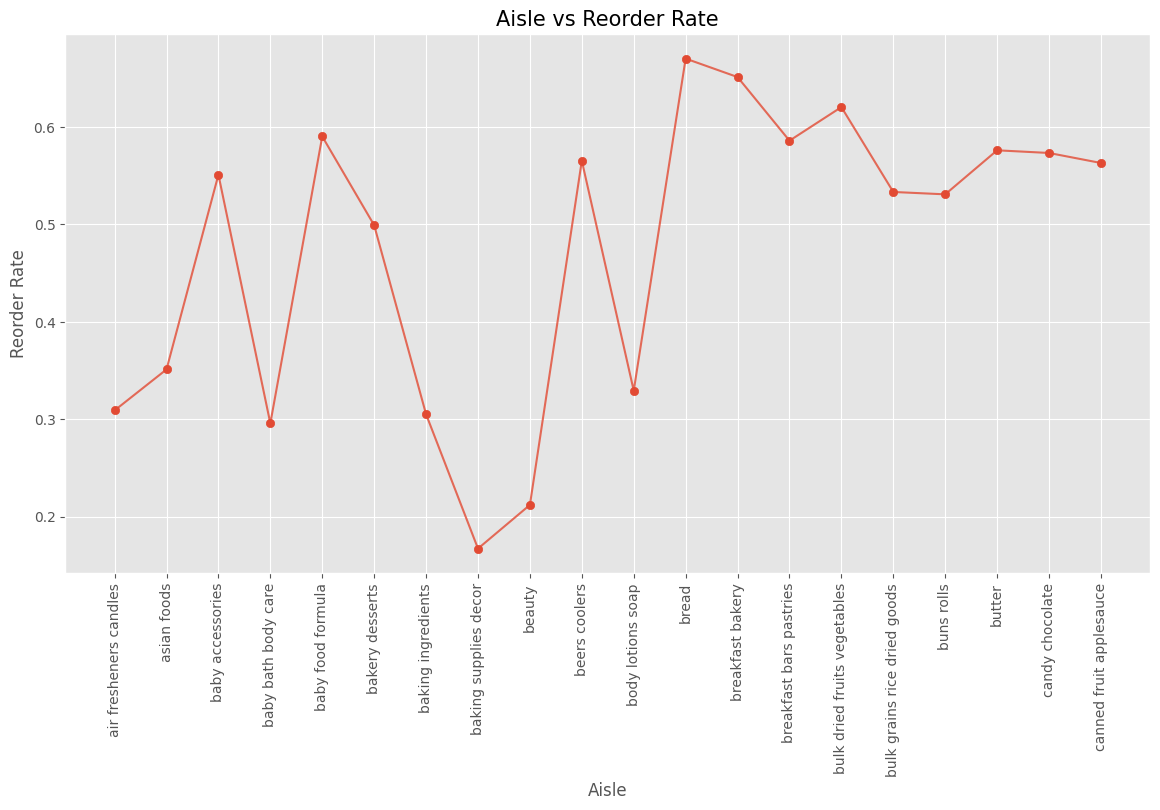

In [85]:
# 87. Aisle vs Reorder Rate
plt.figure(figsize=(14, 7))
plt.plot(list(df_temp4['aisle'])[0:20], df_temp4['reordered'].values[0:20], alpha=0.8)
plt.scatter(list(df_temp4['aisle'])[0:20], df_temp4['reordered'].values[0:20])
plt.ylabel('Reorder Rate', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.title("Aisle vs Reorder Rate", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

### 10.1. Analyze Reorders by Aisle (Total)

In [86]:
# 88. Group the data by aisle and calculate count and sum
%%time
df_temp5 = transactions_data.groupby("aisle")["reordered"].agg(['count', 'sum']).rename(columns={'count': 'total', 'sum': 'reorders'})
df_temp5 = df_temp5.sort_values('total', ascending=False).reset_index()

CPU times: user 2.5 s, sys: 424 ms, total: 2.92 s
Wall time: 2.9 s


The general objective of the above code snippet is to group the transaction data by aisle, calculate the total occurrences and the sum of reorders for each aisle, rename the resulting columns to be more descriptive, sort the aisles by total frequency in descending order, and finally reset the index of the resulting DataFrame.

In [87]:
# 89. Display the first few rows of the grouped DataFrame
df_temp5.head()

,aisle,total,reorders
0,fresh fruits,3642188,2615469
1,fresh vegetables,3418021,2032172
2,packaged vegetables fruits,1765313,1127177
3,yogurt,1452343,997018
4,packaged cheese,979763,573383


In [88]:
# 90. Lists
labels = list(df_temp5.aisle[0:20])
reorder = list(df_temp5.reorders[0:20])
total = list(df_temp5.total[0:20])

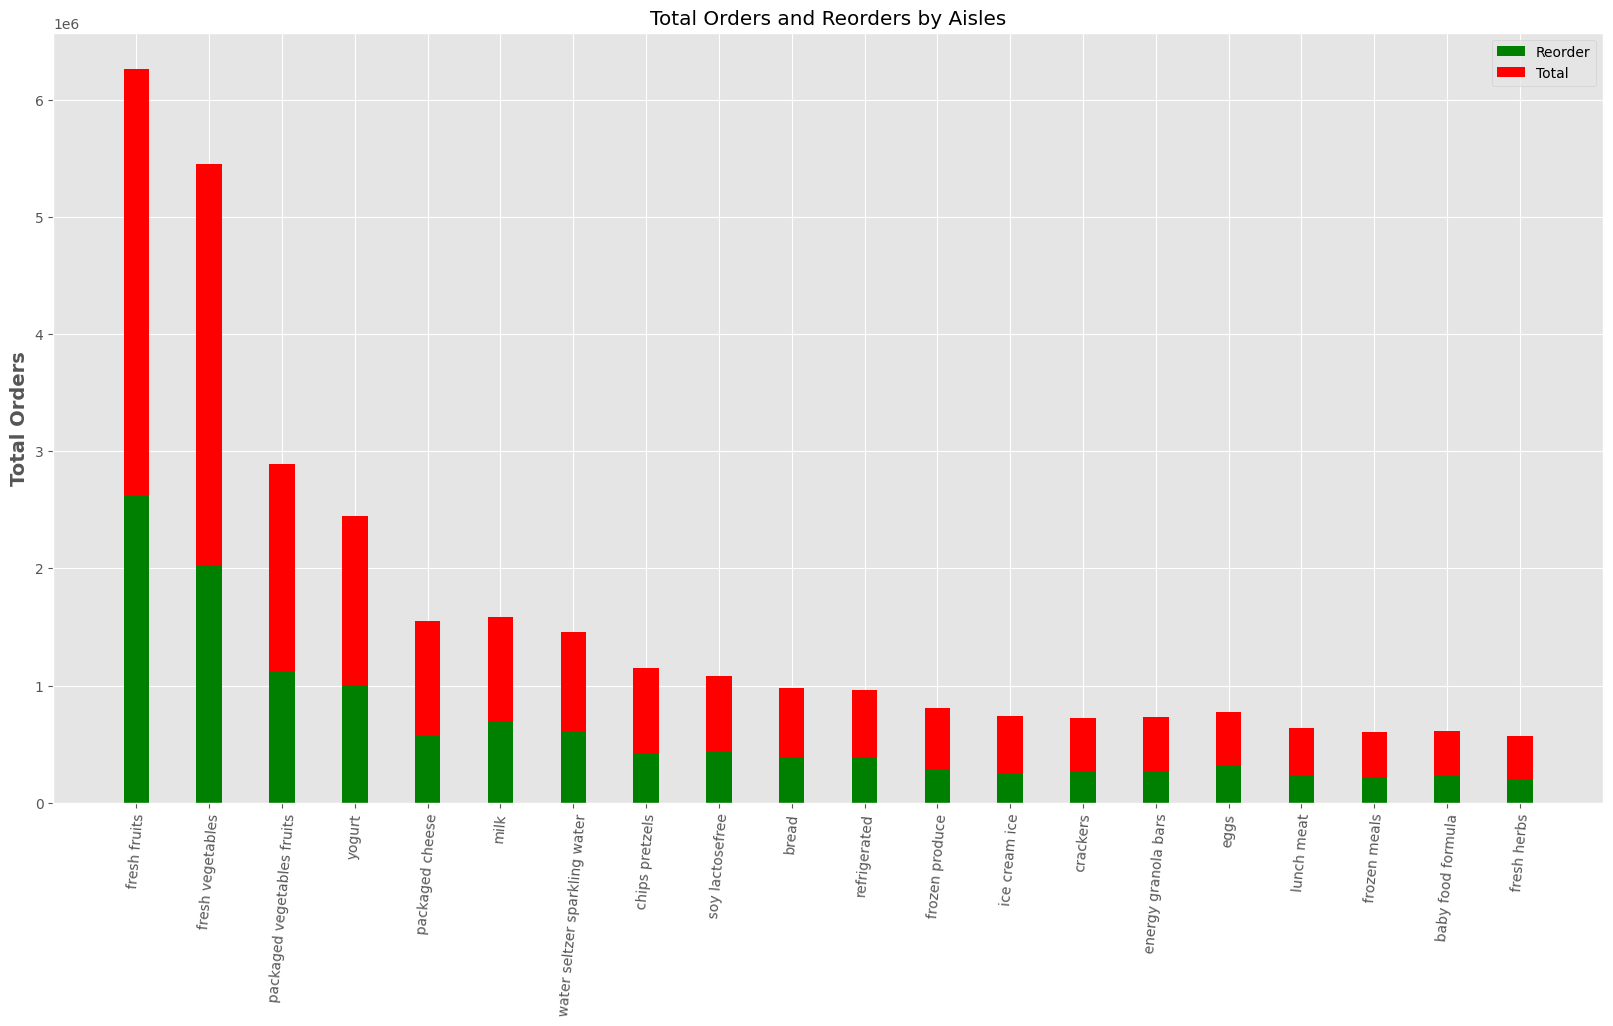

In [89]:
# 91. Plot
width = 0.35
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(labels, reorder, width, label='Reorder', color='green')
ax.bar(labels, total, width, bottom=reorder, label='Total', color='red')
ax.set_ylabel('Total Orders', fontsize=14, fontweight='bold')
ax.legend()
ax.set_title("Total Orders and Reorders by Aisles")
plt.xticks(rotation=85)
plt.show()

> Let's check the relationship between how the product addition order to the cart affects the proportion of new orders.

In [90]:
# 92. Create a copy of one of the columns
transactions_data["add_to_cart_order_mod"] = transactions_data["add_to_cart_order"].copy()

In [91]:
# 93. Locate the transactions
transactions_data["add_to_cart_order_mod"].loc[transactions_data["add_to_cart_order_mod"] > 70] = 70

In [92]:
# 94. Calculate the mean and reset the index
grouped_df = transactions_data.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

In [93]:
# 95. Display the first 10 rows of grouped_df
grouped_df.head(10)

,add_to_cart_order_mod,reordered
0,1,0.677533
1,2,0.676251
2,3,0.658037
3,4,0.636958
4,5,0.617383
5,6,0.600420
6,7,0.585687
7,8,0.573247
8,9,0.561474
9,10,0.551018


## Implementation of the Apriori Algorithm

The Apriori algorithm is used for association rule analysis, which is commonly used in data mining to discover relationships between variables in large datasets. In this context, it is used to find frequent purchase patterns, meaning which products are often bought together.

In [94]:
# 96. Display the first few rows of transactions DataFrame
transactions.head()

,Order_ID,Products
0,2,"[33120, 28985, 9327, 45918, 30035, 17794, 4014..."
1,3,"[33754, 24838, 17704, 21903, 17668, 46667, 174..."
2,4,"[46842, 26434, 39758, 27761, 10054, 21351, 225..."
3,5,"[13176, 15005, 47329, 27966, 23909, 48370, 132..."
4,6,"[40462, 15873, 41897]"


In [95]:
# 97. Prepare the tuple with the transactions
transactions_tup = [tuple(row) for row in transactions['Products'].tolist()]

Run the Apriori Algorithm with support = 0.01 and confidence = 0.2

Let’s use the first 500,000 records to avoid processing overload.

In [96]:
# 98. Run the Apriori Algorithm with support = 0.01 and confidence = 0.2
%%time
itemsets_ap, rules_ap = apriori(transactions_tup[:500000], min_support=0.01, min_confidence=0.2)

CPU times: user 3.67 s, sys: 40 ms, total: 3.71 s
Wall time: 3.71 s


In [97]:
rules_ap

[{21137} -> {13176},
 {21903} -> {13176},
 {27966} -> {13176},
 {47209} -> {13176},
 {16797} -> {24852},
 {21137} -> {24852},
 {27966} -> {21137},
 {21903} -> {24852},
 {28204} -> {24852},
 {47626} -> {24852},
 {47766} -> {24852},
 {49683} -> {24852}]

In [98]:
# 99. Let's consider some items for our analysis
item_A = [27966, 47209, 21137, 47766, 21903, 49683, 47626, 28204, 16797, 21903, 21137, 27966]
item_B = [13176, 13176, 24852, 24852, 24852, 24852, 24852, 24852, 24852, 13176, 13176, 21137]
temp = pd.DataFrame()
temp['itemA'] = item_A
temp['itemB'] = item_B

In [99]:
# 100. Lists for the metrics
support_A = []
support_B = []
support_AB = []
confidence_AB = []
lift_AB = []

In [100]:
# 101. Loop
for i in range(len(temp)):

    # Calculate the support of A
    support_A.append(itemsets_ap[1][tuple([temp['itemA'][i],])] / 500000)

    # Calculate the support of B
    support_B.append(itemsets_ap[1][tuple([temp['itemB'][i],])] / 500000)

    # Calculate the support of A and B
    if tuple([temp['itemA'][i], temp['itemB'][i]]) in itemsets_ap[2].keys():
        support_AB.append(itemsets_ap[2][tuple([temp['itemA'][i], temp['itemB'][i]])] / 500000)
    else:
        support_AB.append(itemsets_ap[2][tuple([temp['itemB'][i], temp['itemA'][i]])] / 500000)

    # Calculate confidence
    confidence_AB.append(support_AB[i] / support_A[i])

    # Calculate lift
    lift_AB.append(support_AB[i] / (support_A[i] * support_B[i]))

In [101]:
# 102. DataFrame with the association rules
df_rules_ap = pd.DataFrame()
df_rules_ap['product_id'] = item_A
df_rules_ap = df_rules_ap.merge(products_data, on='product_id', how='left')
df_rules_ap['Product_A'] = df_rules_ap['product_name']
df_rules_ap = df_rules_ap.drop(columns=['product_id', 'product_name', 'aisle_id', 'department_id'], axis=1)
df_rules_ap['product_id'] = item_B
df_rules_ap = df_rules_ap.merge(products_data, on='product_id', how='left')
df_rules_ap['Product_B'] = df_rules_ap['product_name']
df_rules_ap = df_rules_ap.drop(columns=['product_id', 'product_name', 'aisle_id', 'department_id'], axis=1)
df_rules_ap['Support_A'] = support_A
df_rules_ap['Support_B'] = support_B
df_rules_ap['Support_AB'] = support_AB
df_rules_ap['Confidence_AB'] = confidence_AB
df_rules_ap['Lift_AB'] = lift_AB

In [102]:
df_rules_ap

,Product_A,Product_B,Support_A,Support_B,Support_AB,Confidence_AB,Lift_AB
0,Organic Raspberries,Bag of Organic Bananas,0.042334,0.117802,0.012428,0.293570,2.492064
1,Organic Hass Avocado,Bag of Organic Bananas,0.066218,0.117802,0.019260,0.290857,2.469037
2,Organic Strawberries,Banana,0.082550,0.147194,0.017596,0.213156,1.448127
3,Organic Avocado,Banana,0.054564,0.147194,0.016328,0.299245,2.032997
4,Organic Baby Spinach,Banana,0.075000,0.147194,0.016016,0.213547,1.450784
5,Cucumber Kirby,Banana,0.030218,0.147194,0.010024,0.331723,2.253644
6,Large Lemon,Banana,0.047718,0.147194,0.012692,0.265979,1.806998
7,Organic Fuji Apple,Banana,0.027942,0.147194,0.010630,0.380431,2.584554
8,Strawberries,Banana,0.044496,0.147194,0.012902,0.289959,1.969908
9,Organic Baby Spinach,Bag of Organic Bananas,0.075000,0.117802,0.015500,0.206667,1.754356


In [103]:
# 103. Sorting by Confidence
df_rules_ap.sort_values(by='Confidence_AB', ascending=False)

,Product_A,Product_B,Support_A,Support_B,Support_AB,Confidence_AB,Lift_AB
7,Organic Fuji Apple,Banana,0.027942,0.147194,0.010630,0.380431,2.584554
5,Cucumber Kirby,Banana,0.030218,0.147194,0.010024,0.331723,2.253644
3,Organic Avocado,Banana,0.054564,0.147194,0.016328,0.299245,2.032997
0,Organic Raspberries,Bag of Organic Bananas,0.042334,0.117802,0.012428,0.293570,2.492064
1,Organic Hass Avocado,Bag of Organic Bananas,0.066218,0.117802,0.019260,0.290857,2.469037
8,Strawberries,Banana,0.044496,0.147194,0.012902,0.289959,1.969908
6,Large Lemon,Banana,0.047718,0.147194,0.012692,0.265979,1.806998
11,Organic Raspberries,Organic Strawberries,0.042334,0.082550,0.010524,0.248595,3.011442
10,Organic Strawberries,Bag of Organic Bananas,0.082550,0.117802,0.019122,0.231641,1.966362
4,Organic Baby Spinach,Banana,0.075000,0.147194,0.016016,0.213547,1.450784


In [104]:
# 104. Sorting by Lift
df_rules_ap.sort_values(by='Lift_AB', ascending=False)

,Product_A,Product_B,Support_A,Support_B,Support_AB,Confidence_AB,Lift_AB
11,Organic Raspberries,Organic Strawberries,0.042334,0.082550,0.010524,0.248595,3.011442
7,Organic Fuji Apple,Banana,0.027942,0.147194,0.010630,0.380431,2.584554
0,Organic Raspberries,Bag of Organic Bananas,0.042334,0.117802,0.012428,0.293570,2.492064
1,Organic Hass Avocado,Bag of Organic Bananas,0.066218,0.117802,0.019260,0.290857,2.469037
5,Cucumber Kirby,Banana,0.030218,0.147194,0.010024,0.331723,2.253644
3,Organic Avocado,Banana,0.054564,0.147194,0.016328,0.299245,2.032997
8,Strawberries,Banana,0.044496,0.147194,0.012902,0.289959,1.969908
10,Organic Strawberries,Bag of Organic Bananas,0.082550,0.117802,0.019122,0.231641,1.966362
6,Large Lemon,Banana,0.047718,0.147194,0.012692,0.265979,1.806998
9,Organic Baby Spinach,Bag of Organic Bananas,0.075000,0.117802,0.015500,0.206667,1.754356


### Run the Apriori Algorithm with support = 0.005 and confidence = 0.2.

In [105]:
# 105. Run the Apriori Algorithm with support = 0.005 and confidence = 0.2
%%time
itemsets_ap_1, rules_ap_1 = apriori(transactions_tup[:500000], min_support=0.005, min_confidence=0.2)

CPU times: user 7.42 s, sys: 35.1 ms, total: 7.46 s
Wall time: 7.45 s


In [106]:
rules_ap_1

[{4605} -> {24852},
 {4920} -> {24852},
 {5876} -> {13176},
 {5876} -> {47209},
 {8277} -> {13176},
 {8277} -> {24852},
 {9076} -> {24852},
 {19057} -> {13176},
 {21137} -> {13176},
 {21903} -> {13176},
 {22935} -> {13176},
 {27966} -> {13176},
 {30391} -> {13176},
 {37646} -> {13176},
 {39275} -> {13176},
 {45007} -> {13176},
 {47209} -> {13176},
 {16797} -> {24852},
 {21137} -> {24852},
 {27966} -> {21137},
 {30391} -> {21137},
 {39275} -> {21137},
 {21903} -> {24852},
 {24964} -> {22935},
 {26209} -> {24852},
 {27845} -> {24852},
 {28204} -> {24852},
 {30489} -> {24852},
 {37646} -> {24852},
 {40706} -> {24852},
 {42265} -> {24852},
 {44632} -> {24852},
 {45066} -> {24852},
 {47626} -> {24852},
 {47766} -> {24852},
 {49683} -> {24852},
 {31717} -> {26209},
 {30391} -> {47209}]

In [107]:
# 106. List of items to consider
item_A1 = [27966, 47209, 4605, 21137, 47766, 21903, 49683, 5876, 37646, 40706, 47626, 5876, 30391, 22935, 37646, 31717,
           28204, 27845, 24964, 45066, 9076, 16797, 21903, 8277, 30391, 21137, 27966, 19057, 26209, 45007, 39275, 30489,
           42265, 30391, 8277, 4920, 39275, 44632]
item_B1 = [13176, 13176, 24852, 24852, 24852, 24852, 24852, 47209, 24852, 24852, 24852, 13176, 13176, 13176, 13176, 26209,
           24852, 24852, 22935, 24852, 24852, 24852, 13176, 24852, 47209, 13176, 21137, 13176, 24852, 13176, 21137, 24852,
           24852, 21137, 13176, 24852, 13176, 24852]
temp1 = pd.DataFrame()
temp1['itemA'] = item_A1
temp1['itemB'] = item_B1

In [108]:
# 107. Lists for the metrics
support_A1 = []
support_B1 = []
support_AB1 = []
confidence_AB1 = []
lift_AB1 = []

In [109]:
# 108. Loop
for i in range(len(temp1)):

    support_A1.append(itemsets_ap_1[1][tuple([temp1['itemA'][i],])] / 500000)

    support_B1.append(itemsets_ap_1[1][tuple([temp1['itemB'][i],])] / 500000)

    if tuple([temp1['itemA'][i], temp1['itemB'][i]]) in itemsets_ap_1[2].keys():

        support_AB1.append(itemsets_ap_1[2][tuple([temp1['itemA'][i], temp1['itemB'][i]])] / 500000)

    else:

        support_AB1.append(itemsets_ap_1[2][tuple([temp1['itemB'][i], temp1['itemA'][i]])] / 500000)

    confidence_AB1.append(support_AB1[i] / support_A1[i])

    lift_AB1.append(support_AB1[i] / (support_A1[i] * support_B1[i]))

In [110]:
# 109. DataFrame with the association rules
df_rules_ap1 = pd.DataFrame()
df_rules_ap1['product_id'] = item_A1
df_rules_ap1 = df_rules_ap1.merge(products_data, on='product_id', how='left')
df_rules_ap1['Product_A'] = df_rules_ap1['product_name']
df_rules_ap1 = df_rules_ap1.drop(columns=['product_id', 'product_name', 'aisle_id', 'department_id'], axis=1)
df_rules_ap1['product_id'] = item_B1
df_rules_ap1 = df_rules_ap1.merge(products_data, on='product_id', how='left')
df_rules_ap1['Product_B'] = df_rules_ap1['product_name']
df_rules_ap1 = df_rules_ap1.drop(columns=['product_id', 'product_name', 'aisle_id', 'department_id'], axis=1)
df_rules_ap1['Support_A'] = support_A1
df_rules_ap1['Support_B'] = support_B1
df_rules_ap1['Support_AB'] = support_AB1
df_rules_ap1['Confidence_AB'] = confidence_AB1
df_rules_ap1['Lift_AB'] = lift_AB1

In [111]:
# 110. Sort by Confidence and display the top 10 results
df_rules_ap1.sort_values(by='Confidence_AB', ascending=False).head(10)

,Product_A,Product_B,Support_A,Support_B,Support_AB,Confidence_AB,Lift_AB
16,Organic Fuji Apple,Banana,0.027942,0.147194,0.010630,0.380431,2.584554
19,Honeycrisp Apple,Banana,0.024774,0.147194,0.008832,0.356503,2.421993
6,Cucumber Kirby,Banana,0.030218,0.147194,0.010024,0.331723,2.253644
27,Organic Large Extra Fancy Fuji Apple,Bag of Organic Bananas,0.023374,0.117802,0.007330,0.313596,2.662063
4,Organic Avocado,Banana,0.054564,0.147194,0.016328,0.299245,2.032997
35,Seedless Red Grapes,Banana,0.026054,0.147194,0.007750,0.297459,2.020864
2,Yellow Onions,Banana,0.022814,0.147194,0.006750,0.295871,2.010075
0,Organic Raspberries,Bag of Organic Bananas,0.042334,0.117802,0.012428,0.293570,2.492064
20,Blueberries,Banana,0.017674,0.147194,0.005186,0.293425,1.993460
1,Organic Hass Avocado,Bag of Organic Bananas,0.066218,0.117802,0.019260,0.290857,2.469037


In [112]:
# 111. Sort by Lift and display the top 10 results
df_rules_ap1.sort_values(by='Lift_AB', ascending=False).head(10)

,Product_A,Product_B,Support_A,Support_B,Support_AB,Confidence_AB,Lift_AB
15,Organic Cilantro,Limes,0.021334,0.043640,0.005342,0.250398,5.737819
18,Organic Garlic,Organic Yellow Onion,0.034158,0.035306,0.006868,0.201066,5.694942
7,Organic Lemon,Organic Hass Avocado,0.027242,0.066218,0.006534,0.239850,3.622130
24,Organic Cucumber,Organic Hass Avocado,0.025056,0.066218,0.005396,0.215358,3.252252
26,Organic Raspberries,Organic Strawberries,0.042334,0.082550,0.010524,0.248595,3.011442
30,Organic Blueberries,Organic Strawberries,0.031188,0.082550,0.007284,0.233551,2.829211
27,Organic Large Extra Fancy Fuji Apple,Bag of Organic Bananas,0.023374,0.117802,0.007330,0.313596,2.662063
16,Organic Fuji Apple,Banana,0.027942,0.147194,0.010630,0.380431,2.584554
0,Organic Raspberries,Bag of Organic Bananas,0.042334,0.117802,0.012428,0.293570,2.492064
33,Organic Cucumber,Organic Strawberries,0.025056,0.082550,0.005138,0.205061,2.484078


## Conclusion

By applying mathematics and statistics through programming, we conducted a Market Basket Analysis (MBA) generating association rules between products with various metrics. We can now present our findings to decision-makers and move on to the next project.

The delivery can be made via a report, a chart, or just a summary!

In [113]:
%watermark -a "panData"

Author: panData



In [114]:
%watermark -v -m

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.1.85+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit



In [115]:
%watermark --iversions

matplotlib       : 3.8.0
pandas           : 2.2.2
numpy            : 1.26.4
efficient_apriori: 2.0.5



# **The End**